In [277]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

### Loading data

In [203]:
df = pd.read_csv('Titanic.csv')
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survival
0,1,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,3.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...
885,886,2.0,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0
886,887,1.0,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1
887,888,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,0
888,889,1.0,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1


### EDA (Exploratory Data Analysis)

In [204]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survival
count,890.000000,888.000000,714.000000,890.000000,890.000000,890.000000,890.000000
mean,445.500000,2.306306,29.699118,0.523596,0.382022,32.231521,0.384270
std,257.065167,0.836515,14.526497,1.103224,0.806409,49.714678,0.486696
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.250000,2.000000,20.125000,0.000000,0.000000,7.925000,0.000000
50%,445.500000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,667.750000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,890.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [205]:
df.isna().sum()

PassengerId      0
Pclass           2
Name             0
Sex              0
Age            176
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Survival         0
dtype: int64

<Axes: >

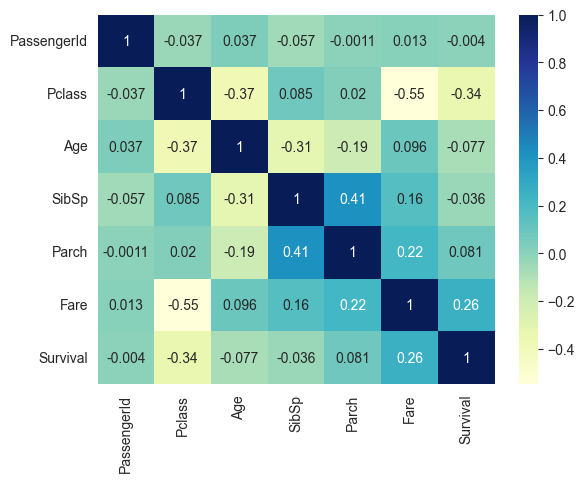

In [206]:
sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True)

<Axes: xlabel='Survival', ylabel='count'>

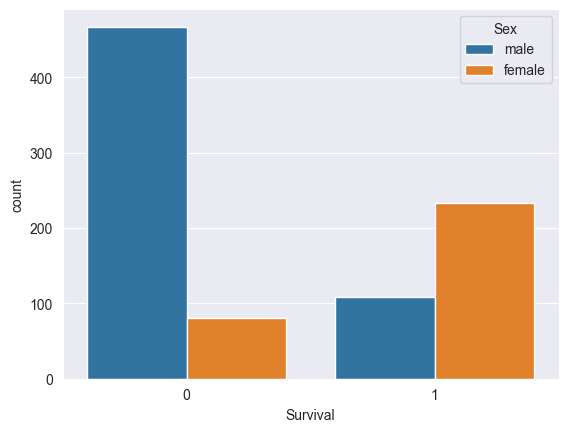

In [207]:
sns.countplot(x = 'Survival', hue = 'Sex', data = df)

<Axes: xlabel='Age', ylabel='Count'>

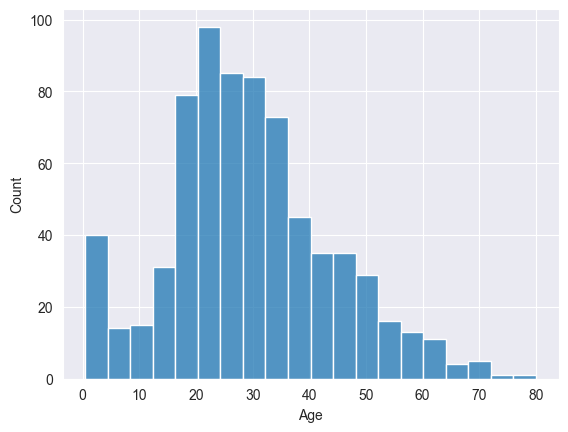

In [208]:
sns.histplot(data=df, x="Age", stat="count")

In [209]:
df.isnull().sum()

PassengerId      0
Pclass           2
Name             0
Sex              0
Age            176
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Survival         0
dtype: int64

### Data Cleaning

In [212]:
# delete unnecessary feature from dataset
df.drop('Name', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)

# PassengerId doesnt have any influence on passenger's survival
df.drop("PassengerId", axis=1, inplace=True)

df = pd.get_dummies(df, columns=['Pclass', 'Sex', 'Embarked'], dtype=int)

# df.dropna(subset=["Pclass", "Embarked"], inplace=True)

df['Age'] = df["Age"].fillna(df['Age'].median())

In [213]:
df.isna().sum()

Age           0
SibSp         0
Parch         0
Fare          0
Survival      0
Pclass_1.0    0
Pclass_2.0    0
Pclass_3.0    0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

## Data splitting

In [214]:
X = df.drop(['Survival'], axis=1) 	# features
y = df['Survival'] 				    # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=240, shuffle=False)

In [215]:
X_train

,Age,SibSp,Parch,Fare,Pclass_1.0,Pclass_2.0,Pclass_3.0,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
645,48.0,1,0,76.7292,1,0,0,0,1,1,0,0
646,19.0,0,0,7.8958,0,0,1,0,1,0,0,1
647,56.0,0,0,35.5000,1,0,0,0,1,1,0,0
648,28.0,0,0,7.5500,0,0,1,0,1,0,0,1


In [216]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 650 to 889
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         240 non-null    float64
 1   SibSp       240 non-null    int64  
 2   Parch       240 non-null    int64  
 3   Fare        240 non-null    float64
 4   Pclass_1.0  240 non-null    int64  
 5   Pclass_2.0  240 non-null    int64  
 6   Pclass_3.0  240 non-null    int64  
 7   Sex_female  240 non-null    int64  
 8   Sex_male    240 non-null    int64  
 9   Embarked_C  240 non-null    int64  
 10  Embarked_Q  240 non-null    int64  
 11  Embarked_S  240 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 24.4 KB


## Logistic Regression

In [256]:
from sklearn.linear_model import LogisticRegression

log_regressor = LogisticRegression()

log_regressor.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [257]:
y_pred = log_regressor.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0])

In [258]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(log_regressor.score(X_test, y_test))

print("Accuracy: {0}".format(accuracy))
print("Precision: {0}".format(precision))
print("Recall: {0}".format(recall))
print(classification_report(y_test, y_pred))

0.825
Accuracy: 0.825
Precision: 0.7972972972972973
Recall: 0.686046511627907
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       154
           1       0.80      0.69      0.74        86

    accuracy                           0.82       240
   macro avg       0.82      0.79      0.80       240
weighted avg       0.82      0.82      0.82       240



In [259]:
confusion_matrix(y_test, y_pred)

array([[139,  15],
       [ 27,  59]])

In [269]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)

print(random_forest.score(X_test, y_test))

accuracy = accuracy_score(y_test, Y_prediction)
precision = precision_score(y_test, Y_prediction)
recall = recall_score(y_test, Y_prediction)

print("Accuracy: {0}".format(accuracy))
print("Precision: {0}".format(precision))
print("Recall: {0}".format(recall))
print(classification_report(y_test, Y_prediction))
print(confusion_matrix(y_test, Y_prediction))

0.8083333333333333
Accuracy: 0.8083333333333333
Precision: 0.7222222222222222
Recall: 0.7558139534883721
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       154
           1       0.72      0.76      0.74        86

    accuracy                           0.81       240
   macro avg       0.79      0.80      0.79       240
weighted avg       0.81      0.81      0.81       240

[[129  25]
 [ 21  65]]


<Axes: >

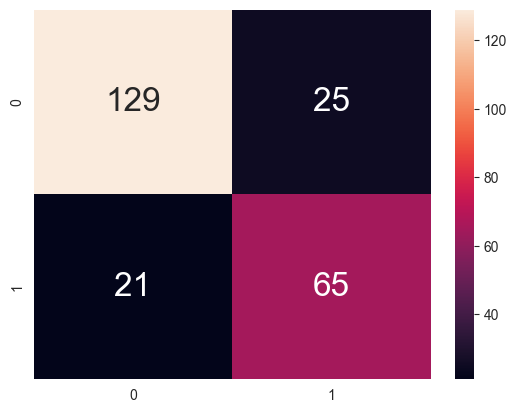

In [276]:
matrix = confusion_matrix(y_test, Y_prediction)
sns.heatmap(matrix, annot=True, fmt='d',     annot_kws={"fontsize":24})

In [266]:
param_grid = {"n_estimators": [3, 10, 30], "max_features": [2, 4, 6, 8]}

from sklearn.model_selection import GridSearchCV, cross_val_score

rf = RandomForestClassifier()

grid_search = GridSearchCV(rf, param_grid, cv=5, return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True)

In [267]:
best_forest_class = grid_search.best_estimator_
best_forest_class.score(X_test, y_test)

0.8083333333333333

## Decision Tree Classifier

In [236]:
from sklearn.tree import DecisionTreeClassifier

In [263]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_prediction = decision_tree.predict(X_test)

print(decision_tree.score(X_test, y_test))

accuracy = accuracy_score(y_test, Y_prediction)
precision = precision_score(y_test, Y_prediction)
recall = recall_score(y_test, Y_prediction)

print("Accuracy: {0}".format(accuracy))
print("Precision: {0}".format(precision))
print("Recall: {0}".format(recall))
print(classification_report(y_test, Y_prediction))
print(confusion_matrix(y_test, Y_prediction))

0.775
Accuracy: 0.775
Precision: 0.6777777777777778
Recall: 0.7093023255813954
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       154
           1       0.68      0.71      0.69        86

    accuracy                           0.78       240
   macro avg       0.76      0.76      0.76       240
weighted avg       0.78      0.78      0.78       240

[[125  29]
 [ 25  61]]
